<a href="https://colab.research.google.com/github/sergiocabrales/python/blob/main/SupportVectorMachineRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This program predicts the price of FB stock for a specific day
#             using the Machine Learning algorithm called 
#             Support Vector Regression (SVR) Model

In [ ]:
#import the packages
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo',start='2013-01-01', end='2021-03-30')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,19.821428,19.343929,19.779285,19.608213,560518000.0,17.039789
2013-01-03,19.631071,19.321428,19.567142,19.360714,352965200.0,16.824715
2013-01-04,19.236786,18.779642,19.177500,18.821428,594333600.0,16.356062
2013-01-07,18.903570,18.400000,18.642857,18.710714,484156400.0,16.259851
2013-01-08,18.996071,18.616072,18.900356,18.761070,458707200.0,16.303608
...,...,...,...,...,...,...
2021-03-24,122.900002,120.070000,122.820000,120.089996,88530500.0,120.089996
2021-03-25,121.660004,119.000000,119.540001,120.589996,98844700.0,120.589996
2021-03-26,121.480003,118.919998,120.349998,121.209999,93958900.0,121.209999


In [ ]:
#Reset index
df = df.reset_index()
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2013-01-02,19.821428,19.343929,19.779285,19.608213,560518000.0,17.039789
1,2013-01-03,19.631071,19.321428,19.567142,19.360714,352965200.0,16.824715
2,2013-01-04,19.236786,18.779642,19.177500,18.821428,594333600.0,16.356062
3,2013-01-07,18.903570,18.400000,18.642857,18.710714,484156400.0,16.259851
4,2013-01-08,18.996071,18.616072,18.900356,18.761070,458707200.0,16.303608
...,...,...,...,...,...,...,...
2070,2021-03-24,122.900002,120.070000,122.820000,120.089996,88530500.0,120.089996
2071,2021-03-25,121.660004,119.000000,119.540001,120.589996,98844700.0,120.589996
2072,2021-03-26,121.480003,118.919998,120.349998,121.209999,93958900.0,121.209999
2073,2021-03-29,122.580002,120.730003,121.650002,121.389999,80819200.0,121.389999


In [ ]:
#Print the last row of data (this will be the data that we test on)
actual_price = df.tail(1)
actual_price

,Date,High,Low,Open,Close,Volume,Adj Close
2074,2021-03-30,120.400002,118.860001,120.110001,119.900002,85671900.0,119.900002


In [ ]:
#Get all of the data except for the last row
df = df.head(len(df)-1)
print(df)
print(df.shape)

           Date        High         Low  ...       Close       Volume   Adj Close
0    2013-01-02   19.821428   19.343929  ...   19.608213  560518000.0   17.039789
1    2013-01-03   19.631071   19.321428  ...   19.360714  352965200.0   16.824715
2    2013-01-04   19.236786   18.779642  ...   18.821428  594333600.0   16.356062
3    2013-01-07   18.903570   18.400000  ...   18.710714  484156400.0   16.259851
4    2013-01-08   18.996071   18.616072  ...   18.761070  458707200.0   16.303608
...         ...         ...         ...  ...         ...          ...         ...
2069 2021-03-23  124.239998  122.139999  ...  122.540001   95467100.0  122.540001
2070 2021-03-24  122.900002  120.070000  ...  120.089996   88530500.0  120.089996
2071 2021-03-25  121.660004  119.000000  ...  120.589996   98844700.0  120.589996
2072 2021-03-26  121.480003  118.919998  ...  121.209999   93958900.0  121.209999
2073 2021-03-29  122.580002  120.730003  ...  121.389999   80819200.0  121.389999

[2074 rows x 7 

In [ ]:
#Create the lists / X and y data set
days = list()
adj_close_prices = list()

In [ ]:
df_days = df.loc[:,'Date']
df_adj_close = df.loc[:,'Adj Close']

In [ ]:
#Create the independent data set 'X' as days
for day in df_days:
   days.append([day.day])
#Create the dependent data set 'y' as prices
for adj_close_price in df_adj_close:
   adj_close_prices.append(float(adj_close_price))

In [ ]:
print(days)

[[2], [3], [4], [7], [8], [9], [10], [11], [14], [15], [16], [17], [18], [22], [23], [24], [25], [28], [29], [30], [31], [1], [4], [5], [6], [7], [8], [11], [12], [13], [14], [15], [19], [20], [21], [22], [25], [26], [27], [28], [1], [4], [5], [6], [7], [8], [11], [12], [13], [14], [15], [18], [19], [20], [21], [22], [25], [26], [27], [28], [1], [2], [3], [4], [5], [8], [9], [10], [11], [12], [15], [16], [17], [18], [19], [22], [23], [24], [25], [26], [29], [30], [1], [2], [3], [6], [7], [8], [9], [10], [13], [14], [15], [16], [17], [20], [21], [22], [23], [24], [28], [29], [30], [31], [3], [4], [5], [6], [7], [10], [11], [12], [13], [14], [17], [18], [19], [20], [21], [24], [25], [26], [27], [28], [1], [2], [3], [5], [8], [9], [10], [11], [12], [15], [16], [17], [18], [19], [22], [23], [24], [25], [26], [29], [30], [31], [1], [2], [5], [6], [7], [8], [9], [12], [13], [14], [15], [16], [19], [20], [21], [22], [23], [26], [27], [28], [29], [30], [3], [4], [5], [6], [9], [10], [11], [12]

In [ ]:
#Create and train an SVR model using a linear kernel
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days,adj_close_prices)
#Create and train an SVR model using a polynomial kernel
poly_svr = SVR(kernel='poly', C=1000.0, degree=2)
poly_svr.fit(days, adj_close_prices)
#Create and train an SVR model using a RBF kernel
rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.15)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

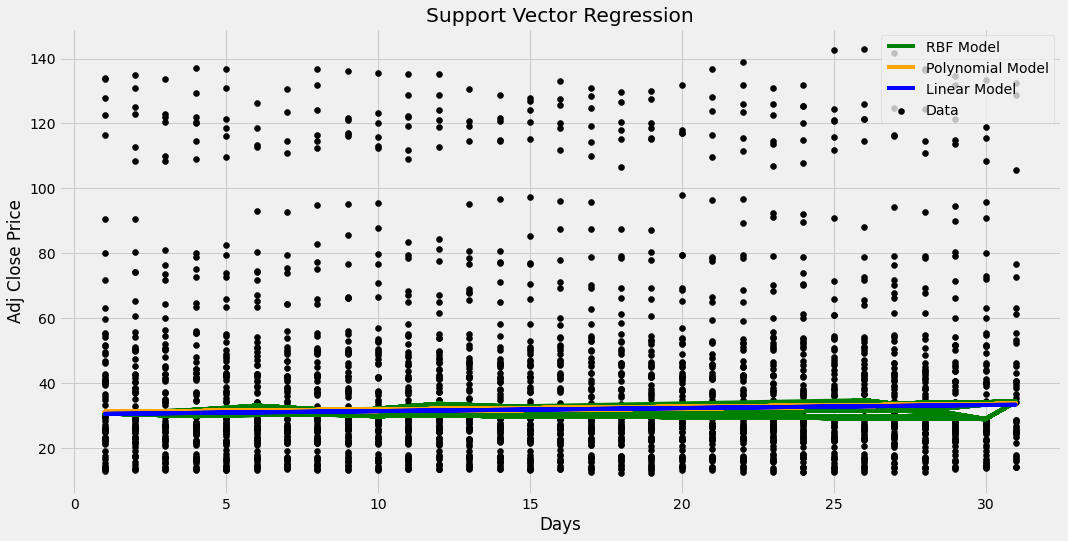

In [ ]:
#Plot the models on a graph to see which has the best fit
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'black', label='Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label='RBF Model')
plt.plot(days, poly_svr.predict(days), color = 'orange', label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color = 'blue', label='Linear Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [ ]:
day = [[31]]
print('The RBF SVR predicted price:',rbf_svr.predict(day))
print('The linear SVR predicted price',lin_svr.predict(day))
print('The polynomial SVR predicted price',poly_svr.predict(day))

The RBF SVR predicted price: [34.21059551]
The linear SVR predicted price [33.26552287]
The polynomial SVR predicted price [33.55351566]
